# Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
df.describe()
# Outlier values can deteriorate the clustering quality.
# We should be careful about outliers in clustering algorithms.

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


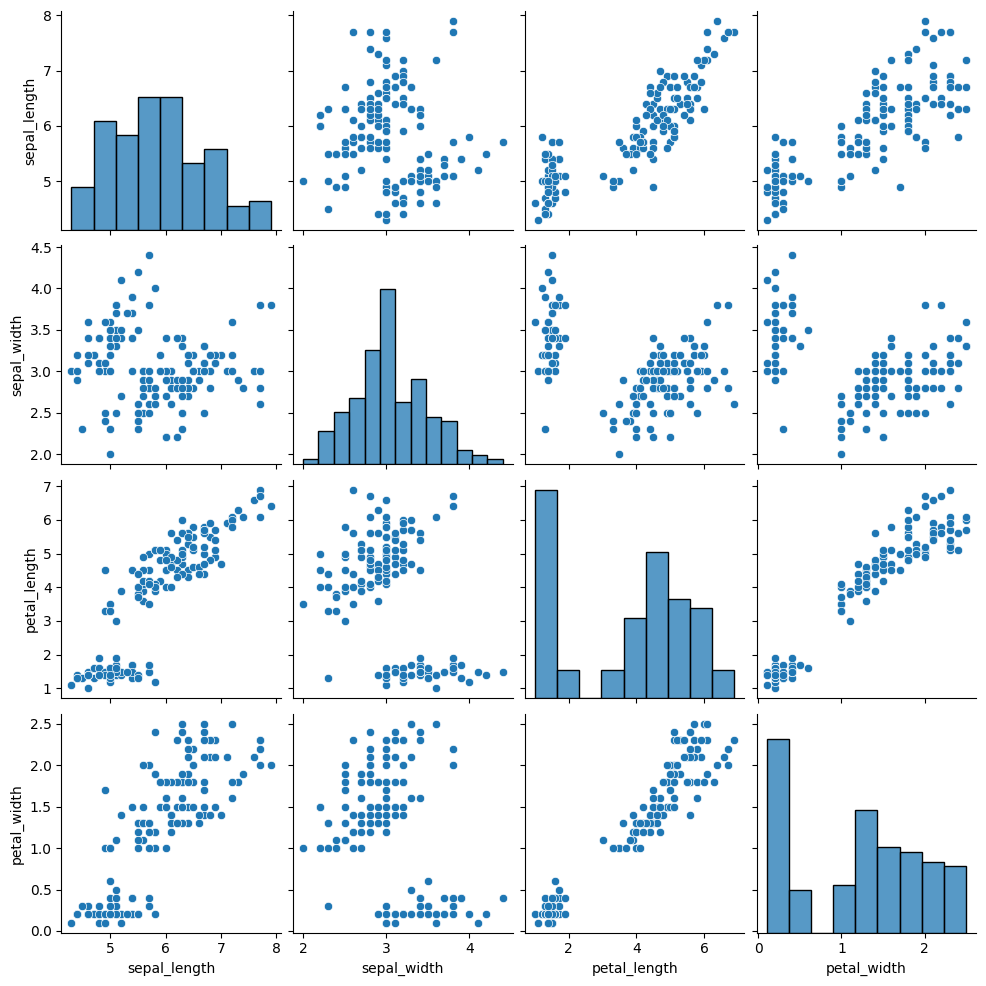

In [6]:
sns.pairplot(df);

# We can get an idea by looking at the scatterplot that "does our data tend to cluster or not?"
# If so, "how many clusters can I divide?"
# We should keep in mind the ideal clustering logic, which we specify as minimal intra cluster distance
# and maximal inter cluster distance, at every stage of clustering problems.

## Scaling Data

**The Hierarchical Cluster algorithm definitely needs scaling**. However, if all our features are in the same/similar range, **there is no need to scale the data**. For these data, scaling may cause worse results in some cases. You should try data both with and without scale and continue with whichever one has good results.

## Hopkins Test

- Hopkins test, a statistical test for randomness of a variable.
- Null Hypothesis (Ho) : Data points are generated by non-random, uniform distribution (implying no meaningful clusters)
- Alternate Hypothesis (Ha): Data points are generated by random data points (presence of clusters)
- The more close 1, the more available to separate clusters

In [7]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [8]:
X = df.copy()

In [9]:
hopkins(X, 1)

0.8326287838255058

## Dendrogram

- Tree-like hierarchical representation of clusters is called a dendrogram.   
- It illustrates the arrangement of the clusters produced by the corresponding analyses.

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage

# The affinity hyperparameter specifies how to measure the distance between observations. The default is euclidean.
# Linkage hyperparameter Specifies how these distances will be measured (ward, compelete, single, average).

In [11]:
# dendrogram()

# dendogram needs the data, at the same time it asks for the information on how to measure the distances.
# For this reason, the linkage function is given in the dendogram by defining our data and specifying
# how the measurement will be made into the linkage function.
# In the light of this information, the dendogram clusters the observations and presents these
# assignment operations as a branch.

**“linkage” parameter: (default= “ward”)**

  {‘ward’, ‘complete’, ‘average’, ‘single’}

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation.
-	Ward minimizes the variance of the clusters being merged.
-	Average uses the average of the distances of each observation of the two sets.
-	Complete or maximum linkage uses the maximum distances between all observations of the two sets.
-	Single uses the minimum of the distances between all observations of the two sets.


In [13]:
hc_ward = linkage(y=X, method="ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

# We give our data and information on how to measure distances to the linkage function to give it to the dendogram.

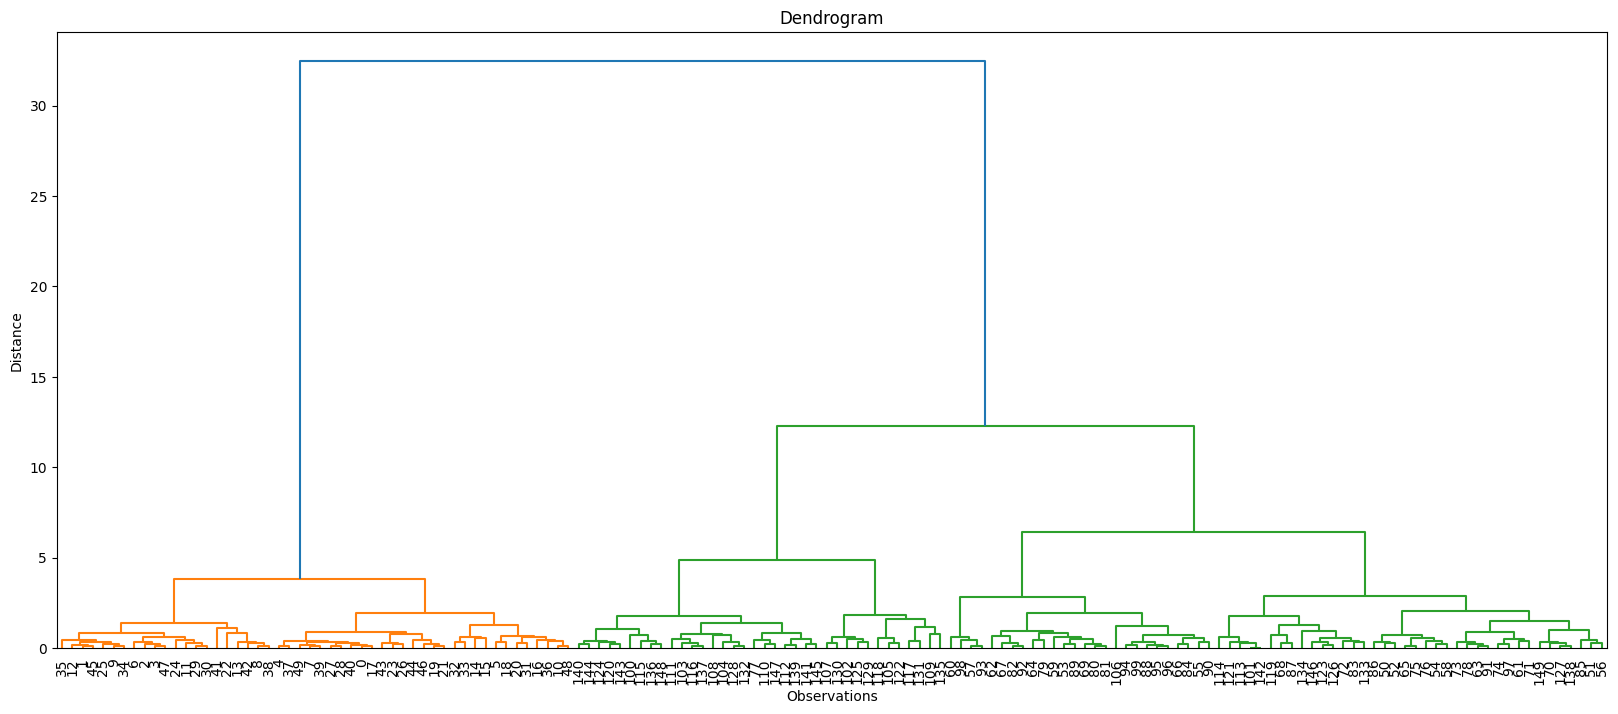

In [14]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);

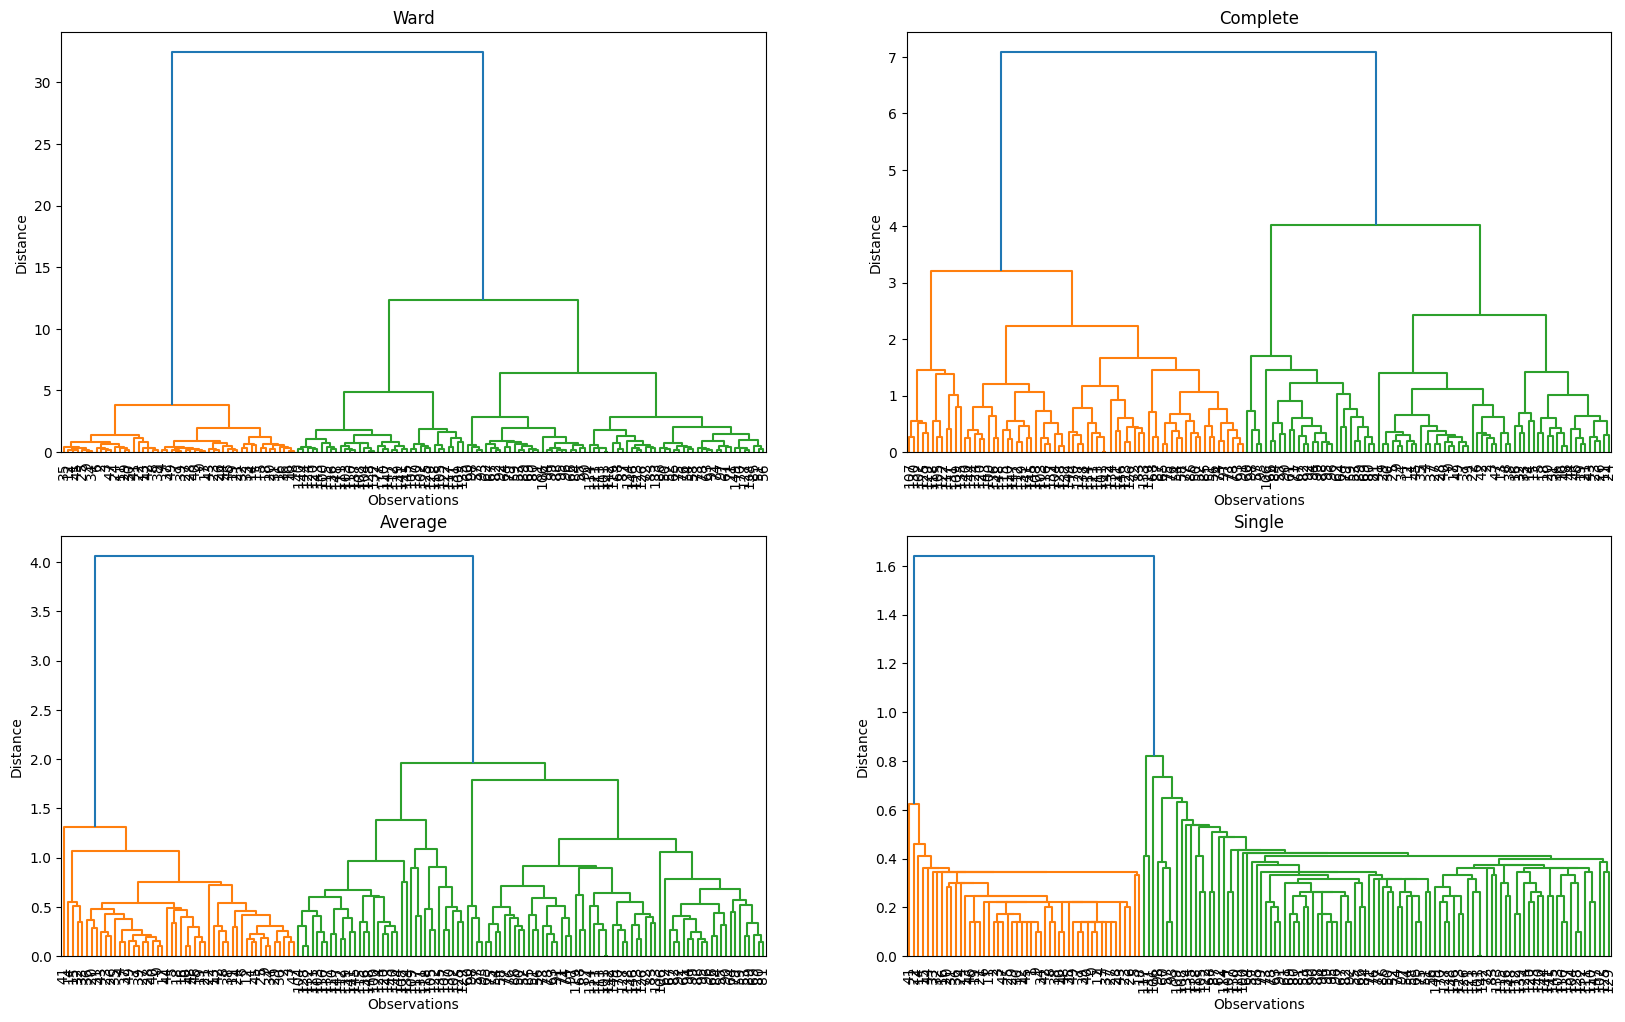

In [15]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

# We will continue with ward as ward provides the minimum distance between clusters and
# the maximum distance between clusters.
# It is the number of clusters that the dendogram shows with the blue line. However,
# the dendogram gives us a suggestion to maximize the distance between the clusters,
# but again, we are not just from the dendogram.
# We will make use of the scatter plot and silhouette score and decide accordingly.

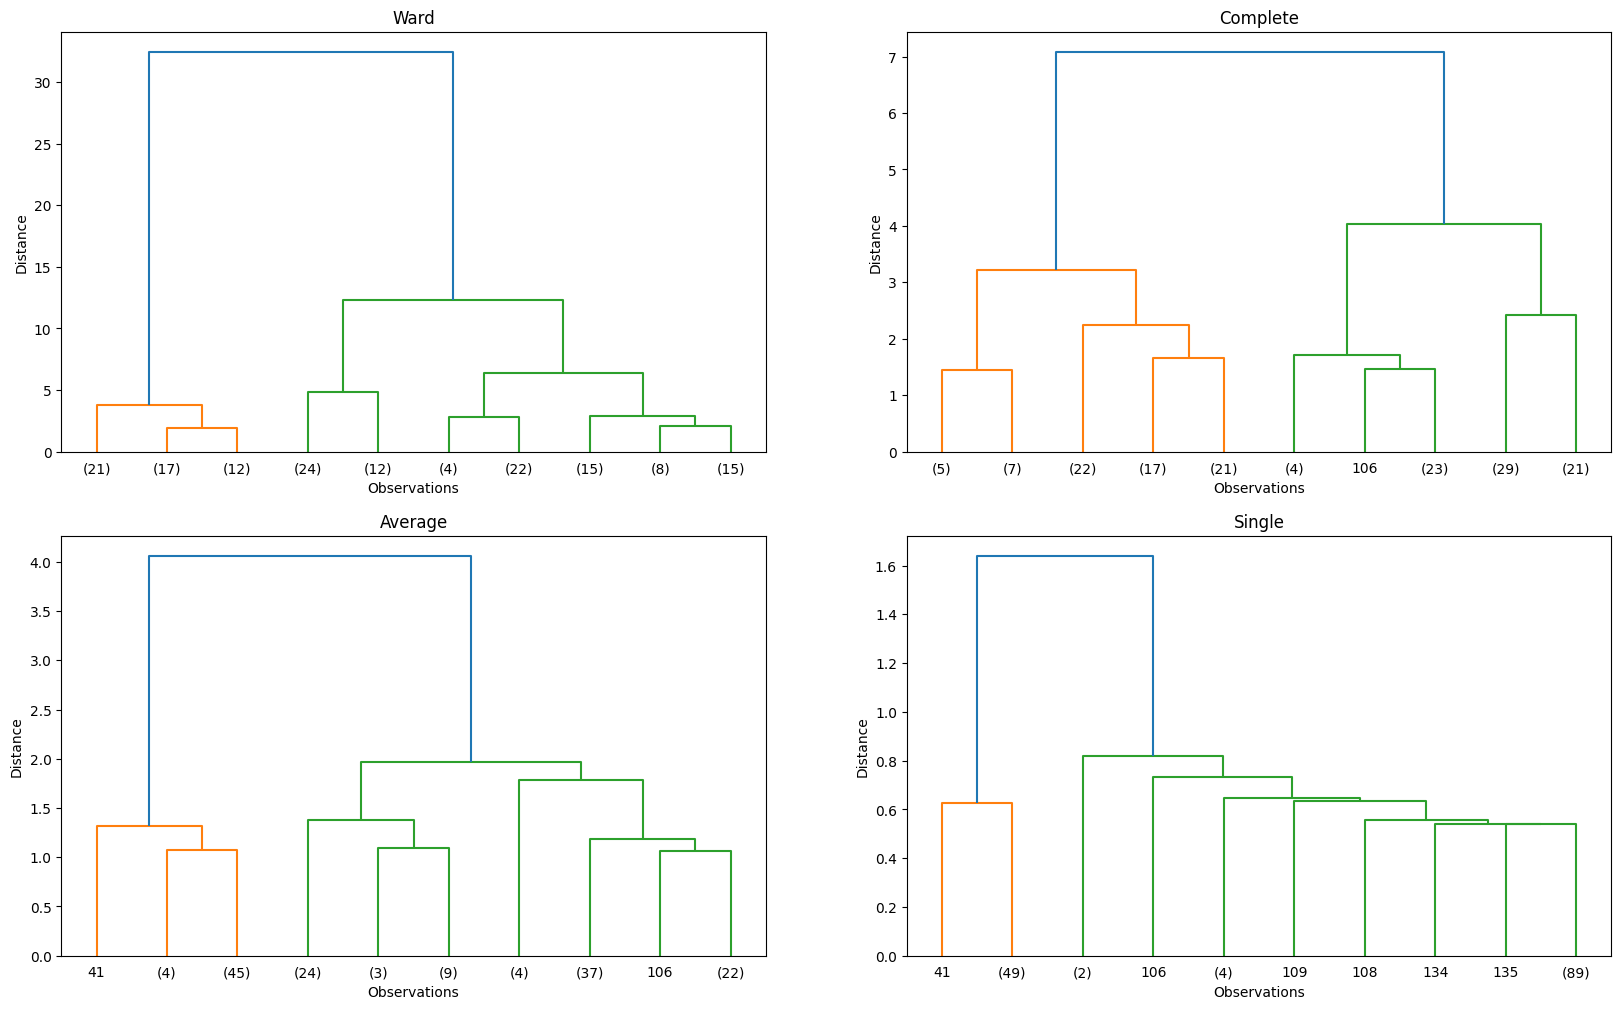

In [16]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

# truncate_mode='lastp' and p=10 are set to simplify the dendogram to show us only the last 10 clusters.

## Hierarchical Clustering (Agglomerative)

- Ideal clustering is characterised by minimal intra cluster distance and maximal inter cluster distance

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
model = AgglomerativeClustering(n_clusters=2,
                                metric="euclidean",
                                linkage="ward")
# We run the model with default values.

In [19]:
model.fit_predict(X)
# The hierarchical clusstar in k-means does not have a predict property.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [20]:
model.labels_
# After doing fit or fit_predict, we can see the clusters with label_ attirbute.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### S(Silhouette) Score

- If the ground truth labels are not known, evaluation must be performed using the model itself. (One of the evaluation method is Silhouette Coefficient)
- A higher Silhouette Coefficient score relates to a model with better defined clusters.
- a :The mean distance between a sample and all other points in the same class.
  b: The mean distance between a sample and all other points in the next nearest cluster.

s = (b-a) / max(a,b)

In [21]:
from sklearn.metrics import silhouette_score

In [22]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

# In n_clusters=2 the silhouette score is high but;
# If I choose the number of clusters as 2, one of the clusters will spread over a very large area
# according to the scatterplot.
# So we are thinking if we can choose n_clusters=3. In the ward dendogram ,
# We choose 3 because we see that the minimum inter-cluster distance is at the maximum level within 3 clusters.
# the silhouette score calculated here is the average of all observations (according to clusters)

Silhouette Score for 2 clusters: 0.6867350732769781
Silhouette Score for 3 clusters: 0.5543236611296425
Silhouette Score for 4 clusters: 0.4889670857554699
Silhouette Score for 5 clusters: 0.4843825892790602
Silhouette Score for 6 clusters: 0.3592376192603089
Silhouette Score for 7 clusters: 0.3422071936620505
Silhouette Score for 8 clusters: 0.3435906599119542
Silhouette Score for 9 clusters: 0.3304886352874664


In [23]:
model2 = AgglomerativeClustering(n_clusters=3,
                                 metric="euclidean",
                                 linkage="ward")
model2.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [24]:
model2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

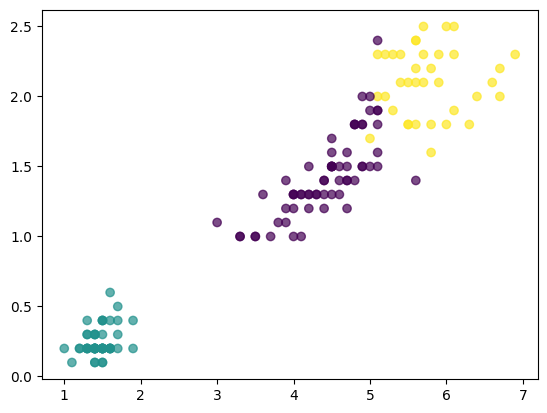

In [25]:
plt.scatter(X["petal_length"],
            X["petal_width"],
            c=model2.labels_,
            cmap="viridis",
            alpha=0.7)

In [26]:
labels = pd.read_csv("label.csv")
labels

# we asked the customer to label it. Labeled the data and delivered it as label.csv.

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [27]:
labels.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [28]:
X["predicted_clusters"] = model2.labels_
X["labels"] = labels
X

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters,labels
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,0,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [29]:
ct = pd.crosstab(X["predicted_clusters"], X["labels"])
ct

# With cross tab, we see how much of the real labels we matched.

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


## ARI Score

- The Adjusted Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
- The value of ARI indicates no good clustering if it is close to zero or negative, and a good cluster if it is close to 1.

In [30]:
from sklearn.metrics.cluster import adjusted_rand_score

In [31]:
adjusted_rand_score(X.labels, X.predicted_clusters)

# adjusted_rand_score is not accuracy,
# adjusted_rand_score penalizes errors.
# In order to calculate the adjusted_rand_score, we somehow need to have
# at least some of the actual labels at our disposal.

0.7311985567707746

## Visualization Clusters

In [32]:
X_actuel_labels = X.labels.map({"versicolor":0, "setosa":1,"virginica":2})
X_actuel_labels

# I convert string types to numeric in order to draw scatter plots.
# I do these conversions according to crosstab.

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: labels, Length: 150, dtype: int64

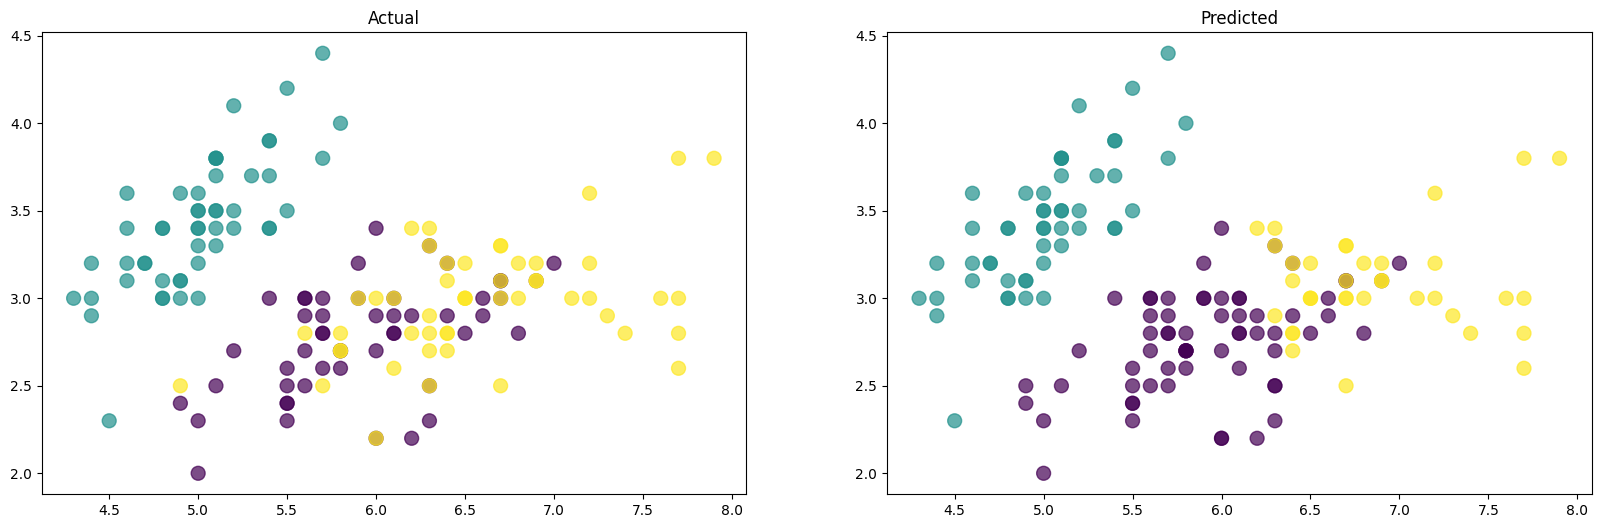

In [34]:
plt.figure(figsize=(20,6))

plt.subplot(121)
plt.scatter(X["sepal_length"],
            X["sepal_width"],
            c=X_actuel_labels,
            cmap="viridis",
            alpha=0.7,
            s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X["sepal_length"],
            X["sepal_width"],
            c=X.predicted_clusters,
            cmap="viridis",
            alpha=0.7,
            s=100)
plt.title("Predicted");

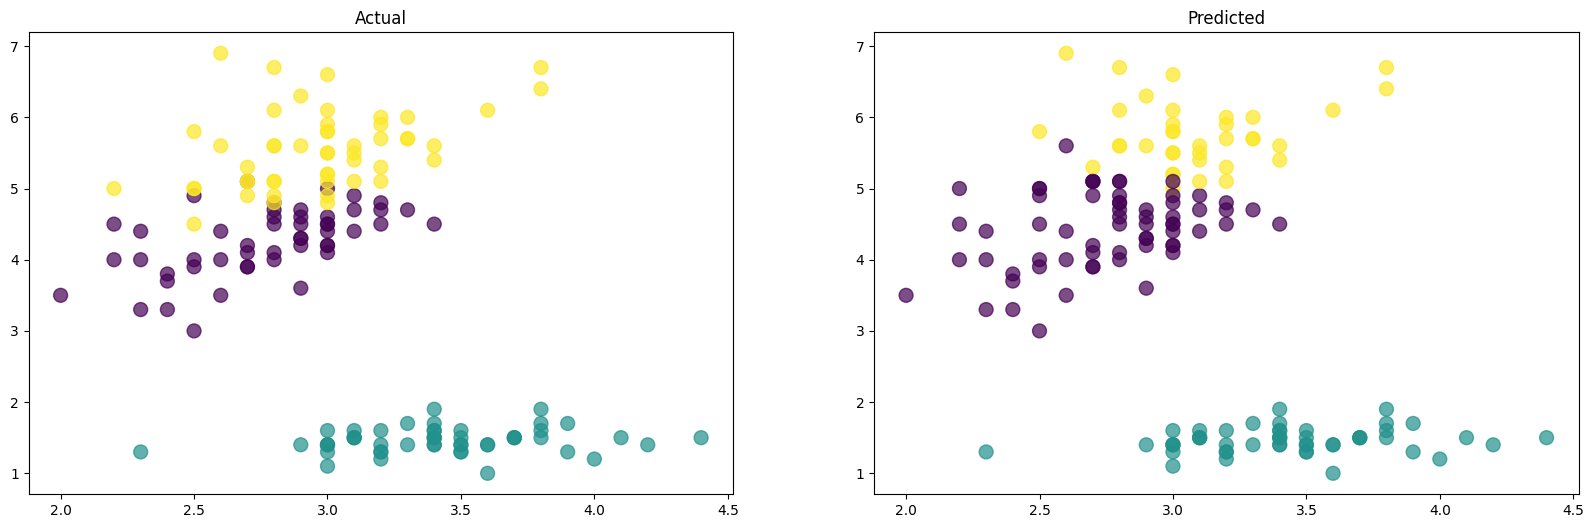

In [35]:
plt.figure(figsize=(20,6))

plt.subplot(121)
plt.scatter(X["sepal_width"],
            X["petal_length"],
            c=X_actuel_labels,
            cmap="viridis",
            alpha=0.7,
            s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X["sepal_width"],
            X["petal_length"],
            c=X.predicted_clusters,
            cmap="viridis",
            alpha=0.7,
            s=100)
plt.title("Predicted");

## Remodeling according to discriminating features

In [36]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width,predicted_clusters,labels
0,5.1,3.5,1.4,0.2,1,setosa
1,4.9,3.0,1.4,0.2,1,setosa
2,4.7,3.2,1.3,0.2,1,setosa
3,4.6,3.1,1.5,0.2,1,setosa
4,5.0,3.6,1.4,0.2,1,setosa


In [37]:
clus_pred = X.iloc[:, [0, 1, 2, 3, 4]].groupby("predicted_clusters").mean().T
clus_pred

predicted_clusters,0,1,2
sepal_length,5.920312,5.006,6.869444
sepal_width,2.751562,3.428,3.086111
petal_length,4.420312,1.462,5.769444
petal_width,1.434375,0.246,2.105556


<Axes: >

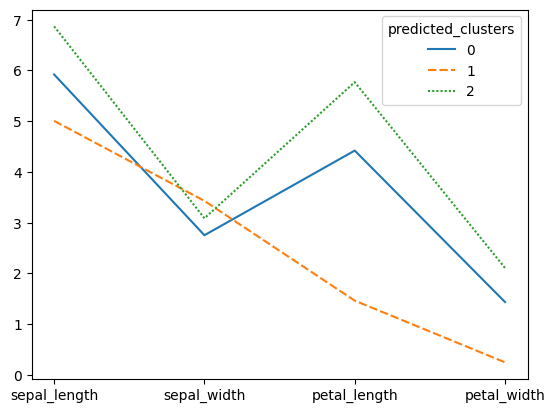

In [38]:
sns.lineplot(data=clus_pred)

<Axes: xlabel='predicted_clusters', ylabel='petal_width'>

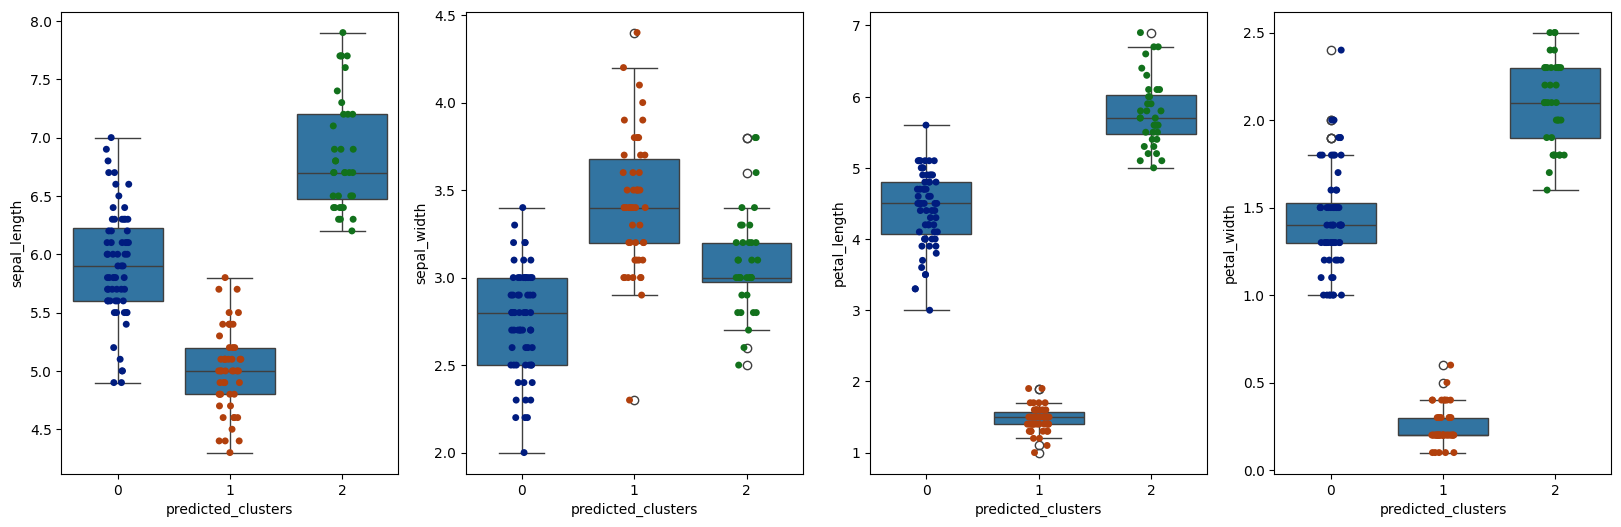

In [39]:
plt.figure(figsize=(20,6))

plt.subplot(141)
sns.boxplot(y="sepal_length", x="predicted_clusters", data=X)
sns.stripplot(y="sepal_length", x="predicted_clusters", data=X, palette="dark")

plt.subplot(142)
sns.boxplot(y="sepal_width", x="predicted_clusters", data=X)
sns.stripplot(y="sepal_width", x="predicted_clusters", data=X, palette="dark")

plt.subplot(143)
sns.boxplot(y="petal_length", x="predicted_clusters", data=X)
sns.stripplot(y="petal_length", x="predicted_clusters", data=X, palette="dark")

plt.subplot(144)
sns.boxplot(y="petal_width",  x="predicted_clusters", data=X)
sns.stripplot(y="petal_width", x="predicted_clusters", data=X, palette="dark")

In [40]:
X2 = X.iloc[:, [2,3]]
X2

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


### Hopkins Test

In [41]:
hopkins(X2, 1)

0.8862763808985171

### Dendrogram

In [42]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

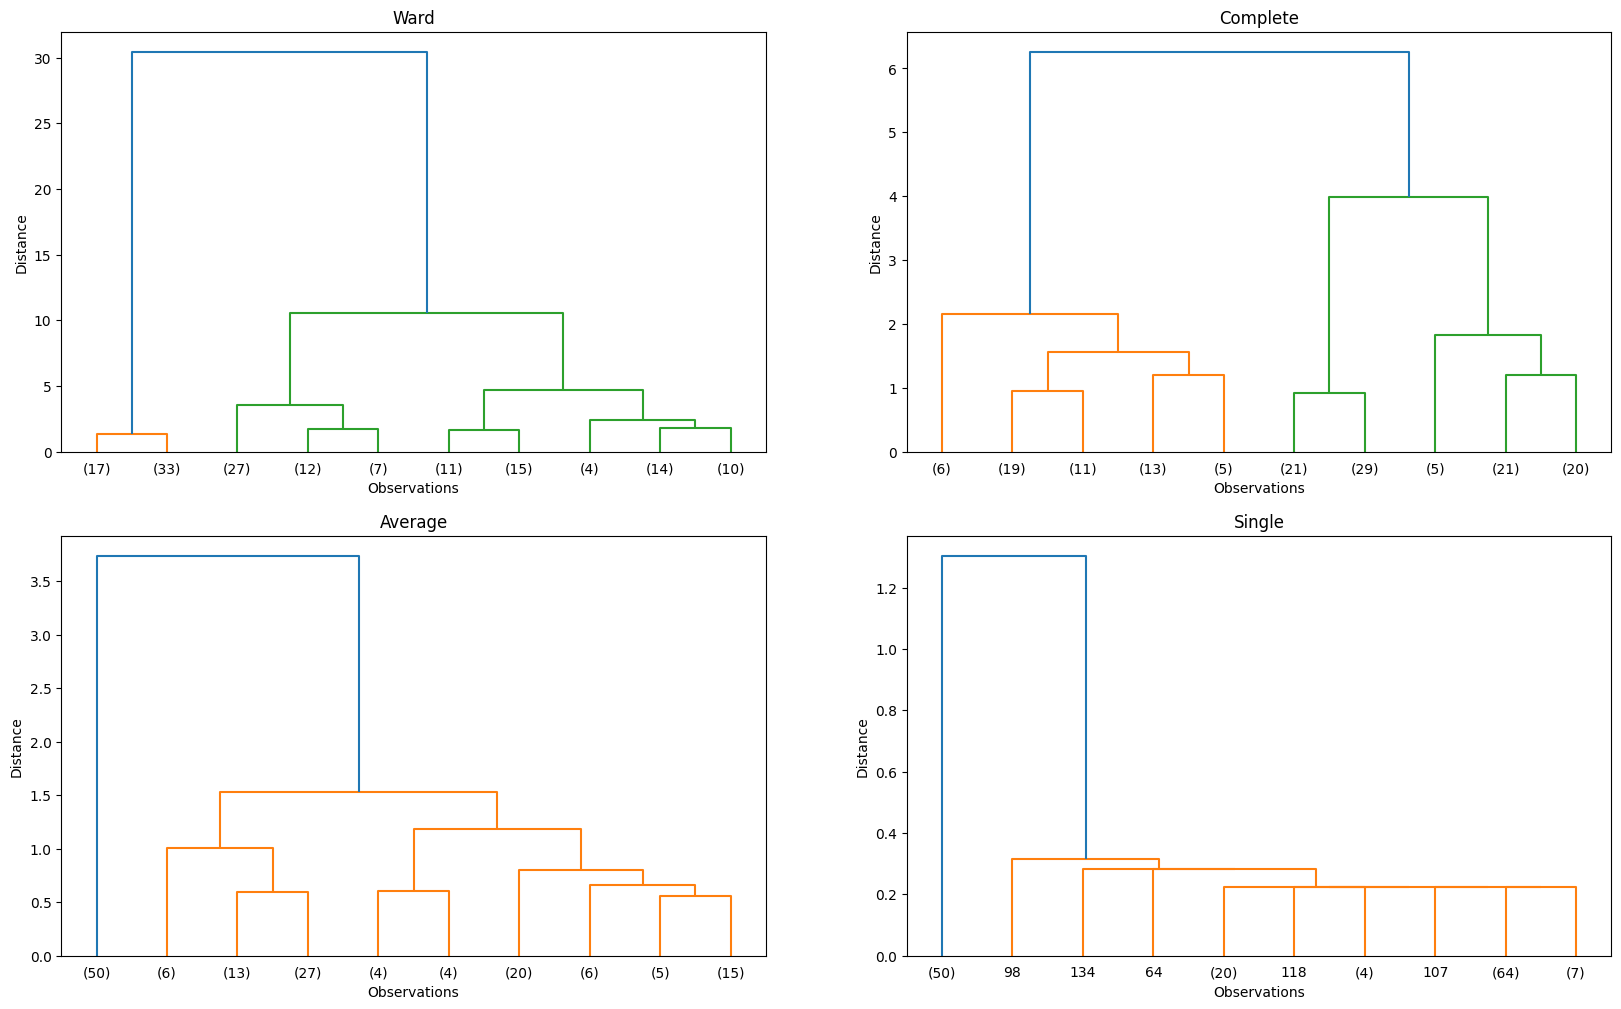

In [43]:
plt.figure(figsize=(20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size=10, truncate_mode='lastp', p=10);

### S(Silhouette) Score

In [44]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.7669465622770762
Silhouette Score for 3 clusters: 0.6573949269287823
Silhouette Score for 4 clusters: 0.5895284480910936
Silhouette Score for 5 clusters: 0.5781917218437669
Silhouette Score for 6 clusters: 0.5747380906148477
Silhouette Score for 7 clusters: 0.5830818097709548
Silhouette Score for 8 clusters: 0.5678904784921739
Silhouette Score for 9 clusters: 0.5469910001848306


## Final model

In [47]:
final_model = AgglomerativeClustering(n_clusters=3,
                                      metric="euclidean",
                                      linkage="ward")
clusters = final_model.fit_predict(X2)

In [48]:
X2["predicted_clusters"] = clusters
X2["labels"] = labels
X2

,petal_length,petal_width,predicted_clusters,labels
0,1.4,0.2,1,setosa
1,1.4,0.2,1,setosa
2,1.3,0.2,1,setosa
3,1.5,0.2,1,setosa
4,1.4,0.2,1,setosa
...,...,...,...,...
145,5.2,2.3,0,virginica
146,5.0,1.9,0,virginica
147,5.2,2.0,0,virginica
148,5.4,2.3,0,virginica


In [49]:
X2_ct = pd.crosstab(X2["predicted_clusters"], X2["labels"])
X2_ct

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,5,49
1,50,0,0
2,0,45,1


In [50]:
ct

labels,setosa,versicolor,virginica
predicted_clusters,,,
0,0,49,15
1,50,0,0
2,0,1,35


In [51]:
X2_labels = X2.labels.map({"virginica":0, "setosa":1,"versicolor":2})
X2_labels

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: labels, Length: 150, dtype: int64

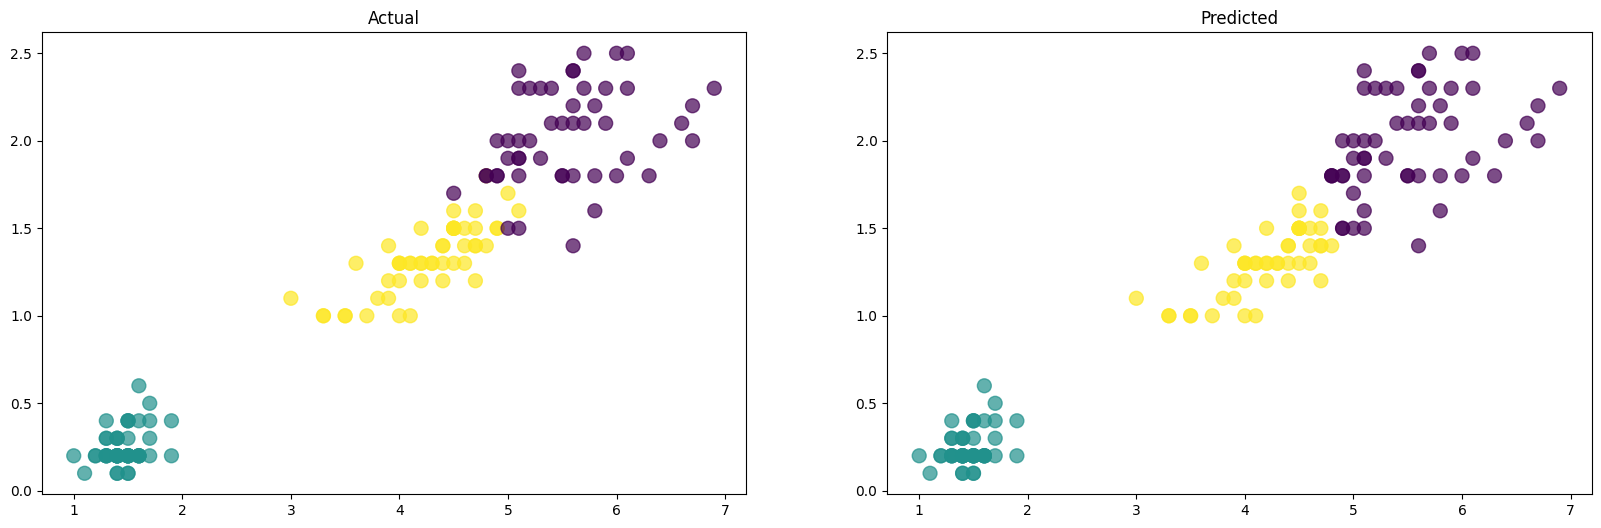

In [52]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X2["petal_length"],
            X2["petal_width"],
            c=X2_labels,
            cmap="viridis",
            alpha=0.7,
            s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X2["petal_length"],
            X2["petal_width"],
            c=X2.predicted_clusters, cmap="viridis",
            alpha=0.7,
            s=100)
plt.title("Predicted");

### ARI Score

In [53]:
adjusted_rand_score(X2.labels, X2.predicted_clusters)

0.8857921001989628

## Prediction cluster of new data

In [54]:
new_data = [[1.7, 0.2], [2.3, 0.5]]

In [55]:
final_model.predict(new_data)

# If we want to make a new observation predict we add these observations to our data ,
# because the hierarchical cluster has no predict attribute.
# We can add and retrain the dendogram and see which cluster it is assigned to after
# the number of clusters we decided after the dendogram.

AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'